In [1]:
import sys

sys.path.append("../")

In [2]:
from datetime import datetime
from pathlib import Path

import numpy as np

from src import bc_optimize, dl_optimize, ea_optimize, sh_optimize
from src.environments import bc, dl, ea, sh
from src.trial import load_trials

/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/ocelot/cpbd/beam.py:1567: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  slice_analysis = slice_analysis_py if not nb_flag else nb.jit(slice_analysis_py)
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/ocelot/cpbd/tm_utils.py:153: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using

In [3]:
EXPERIMENT = "first_tests"
BACKEND = "cheetah"  # TODO: Remember to change to "doocs" for real experiments
LOG_DATA = False  # TODO: Remember to set to True
LOG_TO_LOGBOOK = True  # TODO: Remember to set to True
RL_MAX_STEPS = 50
TRIAL_INDEX = 0

In [4]:
# Load trials
trials = load_trials(Path("../data/trials.yaml"))

In [5]:
comment = f"trial_{TRIAL_INDEX:03d}"

In [6]:
def reset_bc():
    """Set all magnets to zero."""
    env = bc.TransverseTuning(backend=BACKEND, magnet_init_mode=np.zeros(5))
    _, _ = env.reset()


def reset_dl():
    """Set all magnets to zero."""
    env = dl.TransverseTuning(backend=BACKEND, magnet_init_mode=np.zeros(4))
    _, _ = env.reset()


def reset_ea():
    """Set all magnets to zero."""
    env = ea.TransverseTuning(backend=BACKEND, magnet_init_mode=np.zeros(5))
    _, _ = env.reset()


def reset_sh():
    """Set all magnets to zero."""
    env = sh.TransverseTuning(backend=BACKEND, magnet_init_mode=np.zeros(4))
    _, _ = env.reset()

### Section EA

<span style="color:red">Remember to put in AREABSCR1.</span>.


In [7]:
reset_ea()

/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(
 46%|████▌     | 23/50 [00:07<00:09,  2.91it/s]

title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996\nStart time: 2023-12-21 10:36:51.344324\nTime taken: 0:00:02.897401\nNo. of steps: 24\n\nBeam before:\n    mu_x    =  0.3391 mm\n    sigma_x =  0.0236 mm\n    mu_y    =  0.1573 mm\n    sigma_y =  0.0799 mm\n\nBeam after:\n    mu_x    = -0.0082 mm\n    sigma_x =  0.0336 mm\n    mu_y    =  0.0392 mm\n    sigma_y =  0.0266 mm\n\nTarget beam:\n    mu_x    =  0.0000 mm    (e = 0.0400 mm) ;)\n    sigma_x =  0.0000 mm    (e = 0.0400 mm) ;)\n    mu_y    =  0.0000 mm    (e = 0.0400 mm) ;)\n    sigma_y =  0.0000 mm    (e = 0.0400 mm) ;)\n\nResult:\n    |delta_mu_x|    =  0.0082 mm\n    |delta_sigma_x| =  0.0336 mm\n    |delta_mu_y|    =  0.0392 mm\n    |delta_sigma_y| =  0.0266 mm\n\n    MAE =  0.0269 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   8.0717 1/m^2\n    AREAMQZM2 strength = -12.7625 1/m^2\n    AREAMCVM1 kick =  -

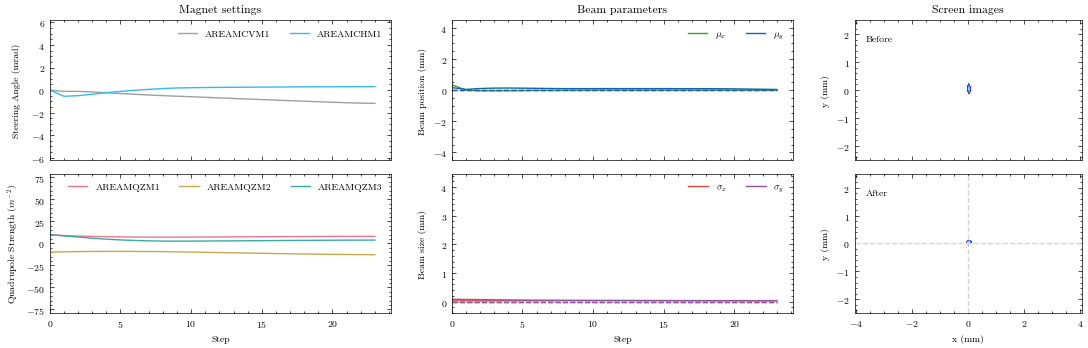

In [8]:
ea_optimize.optimize_donkey(
    target_mu_x=trials[TRIAL_INDEX].target_beam[0],
    target_sigma_x=trials[TRIAL_INDEX].target_beam[1],
    target_mu_y=trials[TRIAL_INDEX].target_beam[2],
    target_sigma_y=trials[TRIAL_INDEX].target_beam[3],
    target_mu_x_threshold=4e-5,
    target_mu_y_threshold=4e-5,
    target_sigma_x_threshold=4e-5,
    target_sigma_y_threshold=4e-5,
    max_steps=RL_MAX_STEPS,
    model_name="polished-donkey-996",
    logbook=LOG_TO_LOGBOOK,
    data_log_dir=(
        f"../data/v3_comparisons/{EXPERIMENT}/ea_donkey_{datetime.now():%Y%m%d%H%M}_{comment}"
        if LOG_DATA
        else None
    ),
    progress_bar=True,
    callback=None,
    backend=BACKEND,
)

In [9]:
reset_ea()

/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(
100%|██████████| 50/50 [00:13<00:00,  3.63it/s]

title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: vital-breeze-514\nStart time: 2023-12-21 10:37:01.424320\nTime taken: 0:00:06.039887\nNo. of steps: 51\n\nBeam before:\n    mu_x    = -0.4482 mm\n    sigma_x =  0.6662 mm\n    mu_y    =  0.8021 mm\n    sigma_y =  0.1004 mm\n\nBeam after:\n    mu_x    =  0.0182 mm\n    sigma_x =  0.2335 mm\n    mu_y    = -0.0328 mm\n    sigma_y =  0.1165 mm\n\nTarget beam:\n    mu_x    =  0.0000 mm    (e = 0.0400 mm) ;)\n    sigma_x =  0.0000 mm    (e = 0.0400 mm) :/\n    mu_y    =  0.0000 mm    (e = 0.0400 mm) ;)\n    sigma_y =  0.0000 mm    (e = 0.0400 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0182 mm\n    |delta_sigma_x| =  0.2335 mm\n    |delta_mu_y|    =  0.0328 mm\n    |delta_sigma_y| =  0.1165 mm\n\n    MAE =  0.1002 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   1.1011 1/m^2\n    AREAMQZM2 strength =  -4.5944 1/m^2\n    AREAMCVM1 kick =  -0.1

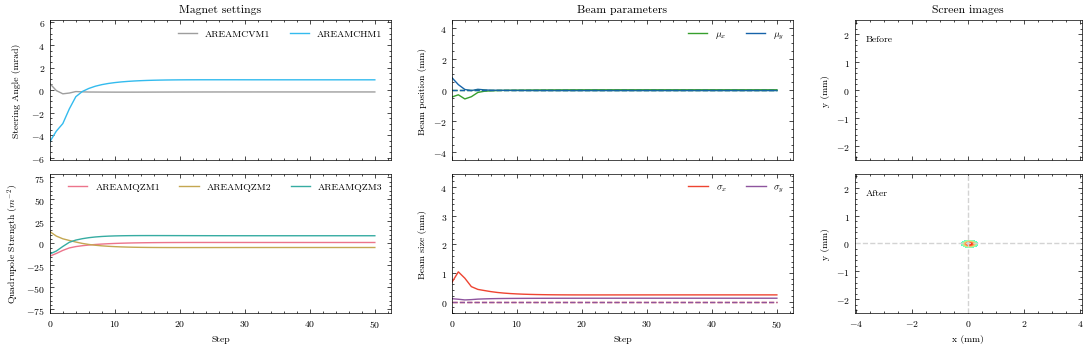

In [10]:
ea_optimize.optimize(
    target_mu_x=trials[TRIAL_INDEX].target_beam[0],
    target_sigma_x=trials[TRIAL_INDEX].target_beam[1],
    target_mu_y=trials[TRIAL_INDEX].target_beam[2],
    target_sigma_y=trials[TRIAL_INDEX].target_beam[3],
    target_mu_x_threshold=4e-5,
    target_mu_y_threshold=4e-5,
    target_sigma_x_threshold=4e-5,
    target_sigma_y_threshold=4e-5,
    max_steps=RL_MAX_STEPS,
    model_name="vital-breeze-514",
    logbook=LOG_TO_LOGBOOK,
    data_log_dir=(
        f"../data/v3_comparisons/{EXPERIMENT}/ea_v3_{datetime.now():%Y%m%d%H%M}_{comment}"
        if LOG_DATA
        else None
    ),
    progress_bar=True,
    callback=None,
    backend=BACKEND,
)

### Section BC

<span style="color:red">Remember to put in ARBCBSCE1.</span>.


In [11]:
reset_bc()

/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(
100%|██████████| 50/50 [00:14<00:00,  3.54it/s]

title = 'Beam Optimisation on ARBCBSCE1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on ARBCBSCE1\n\nAgent: whole-elevator-1\nStart time: 2023-12-21 10:37:17.274061\nTime taken: 0:00:06.271578\nNo. of steps: 51\n\nBeam before:\n    mu_x    =  212.1144 mm\n    sigma_x =  16.3441 mm\n    mu_y    = -11.3553 mm\n    sigma_y =  5.7454 mm\n\nBeam after:\n    mu_x    = -0.0001 mm\n    sigma_x =  0.2380 mm\n    mu_y    =  0.0518 mm\n    sigma_y =  0.3211 mm\n\nTarget beam:\n    mu_x    =  0.0000 mm    (e = 0.0400 mm) ;)\n    sigma_x =  0.0000 mm    (e = 0.0400 mm) :/\n    mu_y    =  0.0000 mm    (e = 0.0400 mm) :/\n    sigma_y =  0.0000 mm    (e = 0.0400 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0001 mm\n    |delta_sigma_x| =  0.2380 mm\n    |delta_mu_y|    =  0.0518 mm\n    |delta_sigma_y| =  0.3211 mm\n\n    MAE =  0.1528 mm\n\nFinal magnet settings:\n    ARMRMQZM4 strength =   0.1035 1/m^2\n    ARMRMQZM5 strength =   0.7188 1/m^2\n    ARMRMCVM5 kick =  

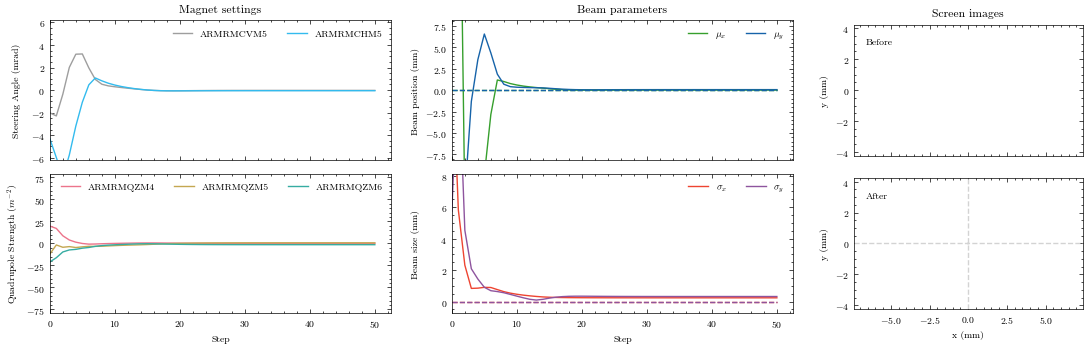

In [12]:
bc_optimize.optimize(
    target_mu_x=trials[TRIAL_INDEX].target_beam[0],
    target_sigma_x=trials[TRIAL_INDEX].target_beam[1],
    target_mu_y=trials[TRIAL_INDEX].target_beam[2],
    target_sigma_y=trials[TRIAL_INDEX].target_beam[3],
    target_mu_x_threshold=4e-5,
    target_mu_y_threshold=4e-5,
    target_sigma_x_threshold=4e-5,
    target_sigma_y_threshold=4e-5,
    max_steps=RL_MAX_STEPS,
    model_name="whole-elevator-1",
    logbook=LOG_TO_LOGBOOK,
    data_log_dir=(
        f"../data/v3_comparisons/{EXPERIMENT}/bc_v3_{datetime.now():%Y%m%d%H%M}_{comment}"
        if LOG_DATA
        else None
    ),
    progress_bar=True,
    callback=None,
    backend=BACKEND,
)

### Section DL

<span style="color:red">Remember to put in ARDLBSCR1.</span>.


In [13]:
reset_dl()

/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(
100%|██████████| 50/50 [00:13<00:00,  3.76it/s]

title = 'Beam Optimisation on ARDLBSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on ARDLBSCR1\n\nAgent: happy-bird-5\nStart time: 2023-12-21 10:37:33.838256\nTime taken: 0:00:05.991959\nNo. of steps: 51\n\nBeam before:\n    mu_x    =  3.6063 mm\n    sigma_x =  1.2704 mm\n    mu_y    = -0.6867 mm\n    sigma_y =  0.0565 mm\n\nBeam after:\n    mu_x    = -0.0239 mm\n    sigma_x =  0.1681 mm\n    mu_y    = -0.0167 mm\n    sigma_y =  0.1331 mm\n\nTarget beam:\n    mu_x    =  0.0000 mm    (e = 0.0400 mm) ;)\n    sigma_x =  0.0000 mm    (e = 0.0400 mm) :/\n    mu_y    =  0.0000 mm    (e = 0.0400 mm) ;)\n    sigma_y =  0.0000 mm    (e = 0.0400 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0239 mm\n    |delta_sigma_x| =  0.1681 mm\n    |delta_mu_y|    =  0.0167 mm\n    |delta_sigma_y| =  0.1331 mm\n\n    MAE =  0.0854 mm\n\nFinal magnet settings:\n    ARDLMCVM1 kick =  -0.0752 mrad\n    ARDLMCHM1 kick =  -0.3758 mrad\n    ARDLMQZM1 strength =  -2.3813 1/m^2\

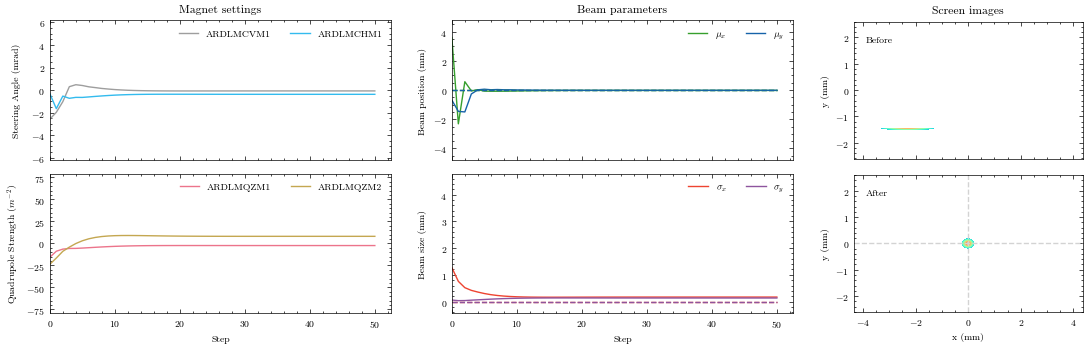

In [14]:
dl_optimize.optimize(
    target_mu_x=trials[TRIAL_INDEX].target_beam[0],
    target_sigma_x=trials[TRIAL_INDEX].target_beam[1],
    target_mu_y=trials[TRIAL_INDEX].target_beam[2],
    target_sigma_y=trials[TRIAL_INDEX].target_beam[3],
    target_mu_x_threshold=4e-5,
    target_mu_y_threshold=4e-5,
    target_sigma_x_threshold=4e-5,
    target_sigma_y_threshold=4e-5,
    max_steps=RL_MAX_STEPS,
    model_name="happy-bird-5",
    logbook=LOG_TO_LOGBOOK,
    data_log_dir=(
        f"../data/v3_comparisons/{EXPERIMENT}/dl_v3_{datetime.now():%Y%m%d%H%M}_{comment}"
        if LOG_DATA
        else None
    ),
    progress_bar=True,
    callback=None,
    backend=BACKEND,
)

### Section SH

<span style="color:red">Remember to put in ARSHBSCE2.</span>.


In [15]:
reset_sh()

/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(
100%|██████████| 50/50 [00:14<00:00,  3.36it/s]

title = 'Beam Optimisation on ARSHBSCE2 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on ARSHBSCE2\n\nAgent: warm-field-2\nStart time: 2023-12-21 10:37:49.679945\nTime taken: 0:00:06.661378\nNo. of steps: 51\n\nBeam before:\n    mu_x    = -32.8502 mm\n    sigma_x =  2.6506 mm\n    mu_y    = -119.2921 mm\n    sigma_y =  13.7864 mm\n\nBeam after:\n    mu_x    = -0.0393 mm\n    sigma_x =  0.5931 mm\n    mu_y    = -0.0138 mm\n    sigma_y =  0.1053 mm\n\nTarget beam:\n    mu_x    =  0.0000 mm    (e = 0.0400 mm) ;)\n    sigma_x =  0.0000 mm    (e = 0.0400 mm) :/\n    mu_y    =  0.0000 mm    (e = 0.0400 mm) ;)\n    sigma_y =  0.0000 mm    (e = 0.0400 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0393 mm\n    |delta_sigma_x| =  0.5931 mm\n    |delta_mu_y|    =  0.0138 mm\n    |delta_sigma_y| =  0.1053 mm\n\n    MAE =  0.1879 mm\n\nFinal magnet settings:\n    ARDLMCVM2 kick =  -0.0792 mrad\n    ARDLMQZM3 strength =   7.5502 1/m^2\n    ARDLMCHM2 kick =   0.1010 m

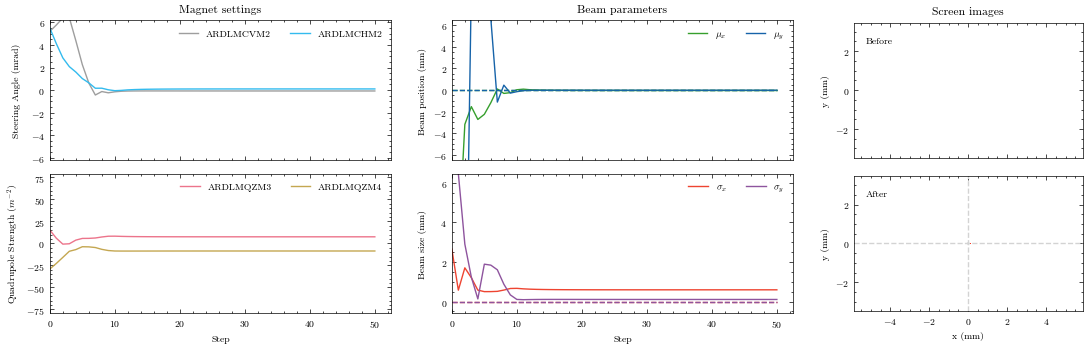

In [16]:
sh_optimize.optimize(
    target_mu_x=trials[TRIAL_INDEX].target_beam[0],
    target_sigma_x=trials[TRIAL_INDEX].target_beam[1],
    target_mu_y=trials[TRIAL_INDEX].target_beam[2],
    target_sigma_y=trials[TRIAL_INDEX].target_beam[3],
    target_mu_x_threshold=4e-5,
    target_mu_y_threshold=4e-5,
    target_sigma_x_threshold=4e-5,
    target_sigma_y_threshold=4e-5,
    max_steps=RL_MAX_STEPS,
    model_name="warm-field-2",
    logbook=LOG_TO_LOGBOOK,
    data_log_dir=(
        f"../data/v3_comparisons/{EXPERIMENT}/sh_v3_{datetime.now():%Y%m%d%H%M}_{comment}"
        if LOG_DATA
        else None
    ),
    progress_bar=True,
    callback=None,
    backend=BACKEND,
)